# **Escuela de Cómputo Evolutivo 2024**
## 16-18 de octubre

# Tutorial: NAS con EAs

## **Ejercicios**
1. Implementar el NSGA-II en pymoo para resolver una función de prueba tradicional.
2. Implementar una red convolucional para la clasificación de la base de datos del MNIST.
3. Implementar la búsqueda de arquitecturas neuronales con el NSGA-II aplicado al problema del MNIST.



## Ejercicio 1:

**Objetivo:** Familiarizarse con la libería pymoo y cómo resolver problemas de optimización con esta librería

Implementar el algoritmo del NSGA-II en pymoo para resolver un problema de optimización.

En este primer ejercicio, se usará una función de prueba bien conocida, la ZDT2. La función ZDT2 está definida como:

$$
\begin{array}{ll}
f_1(x) &= x_1 \\
g(x) &=  1 + \frac{9}{n-1} \sum_{i=2}^{n} x_i\\
f_2(x) &= 1 - \left(f_1 (x)/ g(x)\right)^2
\end{array}
$$

In [ ]:
# Instalación de la librería de pymoo
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.0 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=6245c8996f26ec59833f6a17ff6af96123cb91fdebd7121b00d68a0bc2fc1cbc
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


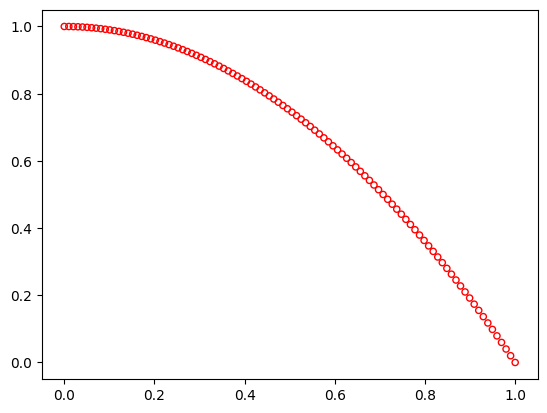

In [ ]:
# Visualización de la forma del frente de Pareto de la función ZDT2
from pymoo.problems import get_problem
from pymoo.util.plotting import plot

problem = get_problem("zdt2")
plot(problem.pareto_front(), no_fill=True)

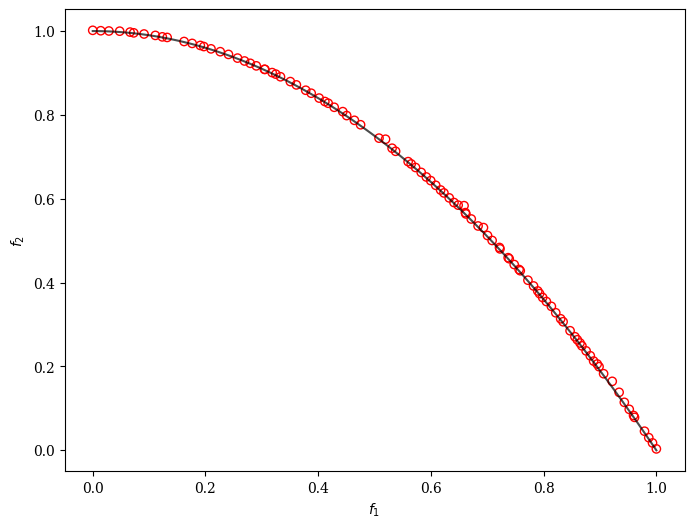

In [ ]:
# Usando el algoritmo NSGA-II de la librería pymoo para resolver el ZDT2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt2")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
# Definiendo una versión personalizada del ZDT2
import numpy as np
from pymoo.core.problem import Problem

class ZDT2(Problem):
  def __init__(self):
    super().__init__(n_var=10, n_obj=2, n_constr=0, xl=0, xu=1, type_var=float)

  def _evaluate(self, X, out, *args, **kwargs):
    f1 = X[:, 0]
    g = 1 + 9/len(X[0]) * np.nansum(X[:, 1:], axis=1)
    f2 = 1 - np.power((f1/g), 2)

    out["F"] = np.column_stack([f1, f2])

  def _calc_pareto_front(self, n_pareto_points=100):
    x = np.linspace(0, 1, n_pareto_points)
    return np.array([x, 1 - np.power(x, 2)]).T

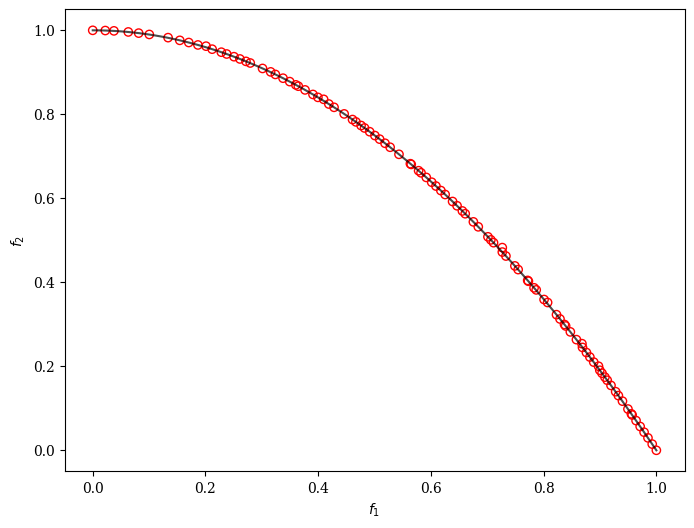

In [ ]:
algorithm = NSGA2(pop_size=100)

res = minimize(ZDT2(),
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

# Ejercicio 2:

**Objetivo:** Familiarizarse con pytorch

Implementar un modelo de CNN usando pytorch para la clasificación de la base de datos mnist

# **MNIST**

El MNIST (Modified National Institute of Standards and Technology) es una base de datos de imágenes que se utiliza ampliamente para entrenar y evaluar modelos de aprendizaje automático, especialmente en el campo de la visión por computadora. Contiene imágenes de dígitos manuscritos del 0 al 9 y se ha convertido en un conjunto de referencia para experimentar con algoritmos de clasificación de imágenes.

Características de la base de datos:

- **Imágenes:** Cada imagen es en escala de grises y tiene un tamaño de 28x28 píxeles.

- **Etiquetas:** Cada imagen está etiquetada con el dígito que representa (del 0 al 9).

- **Cantidad de datos:** El conjunto de entrenamiento contiene 60,000 imágenes y el conjunto de prueba tiene 10,000 imágenes.

- **Propósito:** El MNIST se usa para tareas de clasificación supervisada, donde el objetivo es entrenar un modelo para identificar correctamente los dígitos.

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 217843821.85it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 19531714.58it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 99782014.09it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 7769383.67it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



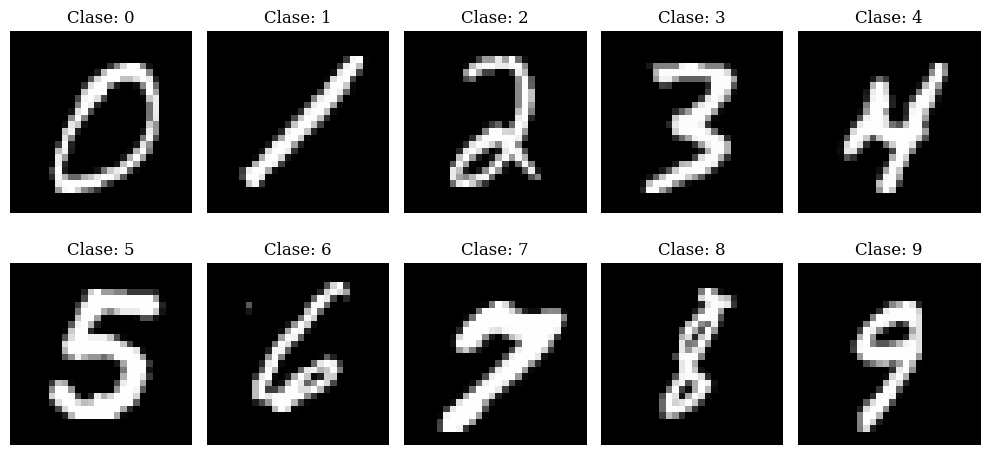

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

# Transformación: convertir las imágenes a tensores
transform = transforms.Compose([transforms.ToTensor()])

# Descargar y cargar el conjunto de entrenamiento
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)

# Diccionario para almacenar un ejemplo de cada clase (0 a 9)
examples = {}

# Recorrer el dataset para encontrar un ejemplo de cada clase
for image, label in trainloader:
    label = label.item()
    if label not in examples:
        examples[label] = image
    if len(examples) == 10:  # Cuando tengamos un ejemplo de cada clase, rompemos el bucle
        break

# Función para mostrar las imágenes
def show_examples(examples):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(examples[i].squeeze(), cmap='gray')
        plt.title(f'Clase: {i}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar los ejemplos
show_examples(examples)

# **¿Qué es PyTorch?**

yTorch es una biblioteca de código abierto desarrollada por Facebook AI Research (FAIR) para el aprendizaje profundo (deep learning) y el cálculo numérico basado en tensores.

Características clave de PyTorch:
- **Tensor computation (cálculo con tensores):**
PyTorch maneja tensores, que son estructuras de datos similares a matrices multidimensionales.

- **Dynamic Computational Graph (gráfico computacional dinámico):**
PyTorch construye el gráfico de cálculo dinámicamente en tiempo de ejecución. Esto significa que el gráfico se genera sobre la marcha y puede ser modificado en cada iteración, lo que otorga una gran flexibilidad al diseñar y depurar modelos.

- **Compatibilidad con redes neuronales (Neural Networks):**
PyTorch proporciona el módulo torch.nn para construir y entrenar redes neuronales. Este módulo facilita la creación de arquitecturas de redes profundas, como redes convolucionales (CNN), redes recurrentes (RNN) y arquitecturas más avanzadas.

- **Ecosistema robusto:**
PyTorch cuenta con un ecosistema en expansión, que incluye herramientas adicionales como TorchVision (para visión por computadora), TorchText (para procesamiento de lenguaje natural), y TorchAudio (para procesamiento de audio).

# **¿Por qué usar PyTorch?**

- **Fácil de aprender y usar:** Su sintaxis es más intuitiva y similar a Python, lo que lo hace accesible tanto para principiantes como para expertos.

- **Ideal para investigación:** Debido a su naturaleza flexible y su enfoque en gráficos computacionales dinámicos, es perfecto para la investigación en aprendizaje profundo y la creación de modelos experimentales.

- **Cálculos en GPU:** PyTorch facilita el uso de GPUs para acelerar el cálculo, lo que permite a los usuarios ejecutar redes neuronales y operaciones matemáticas de manera eficiente en hardware avanzado.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Primera capa convolucional
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Capa de skip connection
        self.conv_skip = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1)

        # Tercera capa convolucional
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Capas totalmente conectadas
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)

        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        out1 = F.relu(self.bn1(self.conv1(x)))

        out1_pooled = self.pool(out1)

        out2 = F.relu(self.bn2(self.conv2(out1_pooled)))

        skip = self.conv_skip(out1_pooled)

        out2 = out2 + skip

        out2_pooled = self.pool(out2)

        out3 = F.relu(self.bn3(self.conv3(out2_pooled)))

        out3_pooled = self.pool(out3)

        out3_flattened = out3_pooled.view(out3_pooled.size(0), -1)

        # Capas totalmente conectadas
        out4 = F.relu(self.fc1(out3_flattened))
        out5 = self.fc2(out4)

        return out5

# Inicializamos la red
model = SimpleCNN()
print(model)

# Probar con una entrada de ejemplo (batch_size=1, 1 canal, 28x28)
input_tensor = torch.randn(1, 1, 28, 28)
output = model(input_tensor)

print("Output shape:", output.shape)  # La forma de salida será (1, 128, 7, 7)


SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_skip): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Output shape: torch.Size([1, 10])


In [ ]:
import torch.optim as optim

BATCH_SIZE = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training function
def train_model(model, trainloader, num_epochs=5):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  model.train()
  for epoch in range(num_epochs):
      running_loss = 0.0
      for inputs, labels in trainloader:
          inputs, labels = inputs.to(device), labels.to(device)

          # Zero the parameter gradients
          optimizer.zero_grad()

          # Forward pass
          outputs = model(inputs)
          loss = criterion(outputs, labels)

          # Backward pass and optimize
          loss.backward()
          optimizer.step()

          # Print loss statistics
          running_loss += loss.item()
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}')
  print('Finished Training')
  return model

#model = train_model(model, trainloader, num_epochs=5)

In [ ]:
# Clasificar
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=1000, shuffle=False)
# Testing function
def test_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on test set: {100 * correct / total:.2f}%')

#test_model(model, testloader)

## Ejercicio 3:

**Objetivo:** Implementar un método de búsqueda de arquitecturas neuronales con algoritmos evolutivos.

En el diseño, se definirá:

- Cómo codificar las arquitecturas.
- Cómo realizar los operadores evolutivos para generar nuevas arquitecturas.
- Cómo medir la calidad de la arquitectura


In [ ]:
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.sampling.rnd import BinaryRandomSampling

# Constantes
NUM_NODES = 5
NUM_OPS = 4
INPUT_SIZE = 28
BATCH_SIZE = 64
NUM_CLASSES = 10

# Definir operaciones
OPS = [
    lambda in_c, out_c: nn.Conv2d(in_c, out_c, kernel_size=3, padding=1),  # Conv 3x3
    lambda in_c, out_c: nn.Conv2d(in_c, out_c, kernel_size=1),  # Conv 1x1
    lambda in_c, out_c: nn.BatchNorm2d(in_c),  # BatchNorm
    lambda in_c, out_c: nn.MaxPool2d(kernel_size=2, stride=2),  # Max Pooling 2x2
]

# Decodificar la cadena binaria dentro de una arquitectura
def decode_architecture(binary_string, in_channels=1, out_channels=NUM_CLASSES):
    layers = []
    out_c = np.random.choice([16,32,64,128])
    layers.append(OPS[0](in_channels, out_c))
    in_c = out_c
    current_size = INPUT_SIZE

    for i in range(NUM_NODES):
        out_c = np.random.choice([16,32,64,128])
        active_ops = [idx for idx, op in enumerate(binary_string[i*NUM_OPS:(i+1)*NUM_OPS]) if op == 1]

        if active_ops:
            for op_idx in active_ops:
              if op_idx == 3:  # Si se selecciona una capa de Pooling
                if (current_size // 2) >= 1:
                  current_size //= 2
                  layers.append(OPS[op_idx](in_c, out_c))
              else:
                layers.append(OPS[op_idx](in_c, out_c))
              if (op_idx != 2) and (op_idx != 3):
                in_c = out_c

    # Añadir una capa totalmente conectada al final
    layers.append(nn.Flatten())
    layers.append(nn.Linear(in_c * current_size * current_size, out_channels))
    model = nn.Sequential(*layers)

    return model

# Entrena la arquitectura

def train_architecture(model, trainloader):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  model.train()
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader):
    if i > 25:  # Se limita a unas cuantas iteraciones para acelerar
        break
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  return model

# Evalua la arquitectura
def evaluate_architecture(architecture):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = architecture.to(device)

    # Partir en conjunto de entrenamiento y validación
    train_size = int(0.5 * len(trainset))  # 50% para training
    val_size = int(0.5 * len(trainset))    # 50% para validation

    train_data, val_data = random_split(trainset, [train_size, val_size])

    # Dataloaders
    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

    model = train_architecture(model, train_loader)

    # Calcular la precisión aproximada y el tamaño del modelo

    model.eval()  # Establecer el modelo en modo de evaluación
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = correct / total

    # Calculando la complejidad del modelo
    model_size = sum(p.numel() for p in model.parameters() if p.requires_grad)

    return ((val_acc)), (model_size / 5e4)

# Define the NSGA-Net problem using pymoo
class NSGANetProblem(Problem):
    def __init__(self):
        super().__init__(n_var=NUM_NODES * NUM_OPS, n_obj=2, n_constr=0, xl=0, xu=1, type_var=np.int32)

    def _evaluate(self, X, out, *args, **kwargs):
        F = np.zeros((X.shape[0], 2))  # Two objectives: accuracy and model size

        for i, binary_string in enumerate(X):
            binary_string = binary_string.astype(int)  # Convert binary string to int
            model = decode_architecture(binary_string)
            accuracy, model_size = evaluate_architecture(model)

            F[i, 0] = -accuracy  # We want to maximize accuracy (so minimize -accuracy)
            F[i, 1] = model_size  # We want to minimize model size

        out["F"] = F

# Set up the NSGA-II algorithm with pymoo
problem = NSGANetProblem()

algorithm = NSGA2(
    pop_size=10,  # Population size
    sampling=BinaryRandomSampling(),
    crossover=UniformCrossover(prob=0.9),
    mutation=BitflipMutation(prob=0.1),
    eliminate_duplicates=True
)

# Perform the optimization
res = minimize(
    problem,
    algorithm,
    ('n_gen', 5),
    seed=1,
    save_history=True,
    verbose=True
)

# Output the results
print(f"Best architectures: {res.X}")
print(f"Objective values (accuracy, model size): {res.F}")


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       10 |      5 |             - |             -
     2 |       20 |      6 |  0.0253380596 |         ideal
     3 |       30 |      7 |  0.0181609195 |         ideal
     4 |       40 |      6 |  0.0612470433 |             f
     5 |       50 |      8 |  0.1997308727 |         nadir
Best architectures: [[False False  True False False False  True False False False  True  True
  False False False  True False False False  True]
 [ True False False  True  True False  True False False False  True False
  False False  True  True False False  True  True]
 [False False False False False False  True False False False  True  True
  False False  True False False  True False False]
 [False  True False False False False  True False False False  True  True
  False False False False  True  True False  True]
 [False False  True False  True False  True False False False  True  True
  False False False  True False False False  True]
 

In [ ]:
model = decode_architecture(res.X[-1], in_channels=1, out_channels=NUM_CLASSES)
print(model)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

model = train_model(model, trainloader, num_epochs=5)
test_model(model, testloader)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=1152, out_features=10, bias=True)
)
Epoch [1/5], Loss: 0.1055
Epoch [2/5], Loss: 0.0437
Epoch [3/5], 